In [18]:
import numpy as np
from astropy import units as u
from astropy import constants as aconst

In [247]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 10
rcParams['figure.dpi'] = 300


rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif'

# plt.style.use('tableau-colorblind10')

c_mb2016 = "#882255"
c_prehdel = "#44AA99"
c_seyfert = "#117733"
c_yang = "#332288"

### A4 width = 8.268 x 11.693
### margins = 3cm --> 6cm = 2.362205 inch
MPL_STD_WIDTH = 5.905795
MPL_STD_RATIO = 6.4 / 4.8 # width / height (from default)
MPL_STD_HEIGHT = MPL_STD_WIDTH / MPL_STD_RATIO

rcParams['figure.figsize'] = (MPL_STD_WIDTH/1.5, MPL_STD_HEIGHT/1.5)

from pathlib import Path

def save_name(fname, ext="pdf", path=None):
    if path is None:
        path = Path("./figures/milkyway")
    return path / f"{fname}.{ext}"

def savefig(fig, name, ext="pdf", dpi=None, *args, **kwargs):
    if dpi is None:
        dpi = rcParams['figure.dpi']
    sname = save_name(name, ext=ext)
    fig.savefig(sname, dpi=dpi, bbox_inches = "tight")

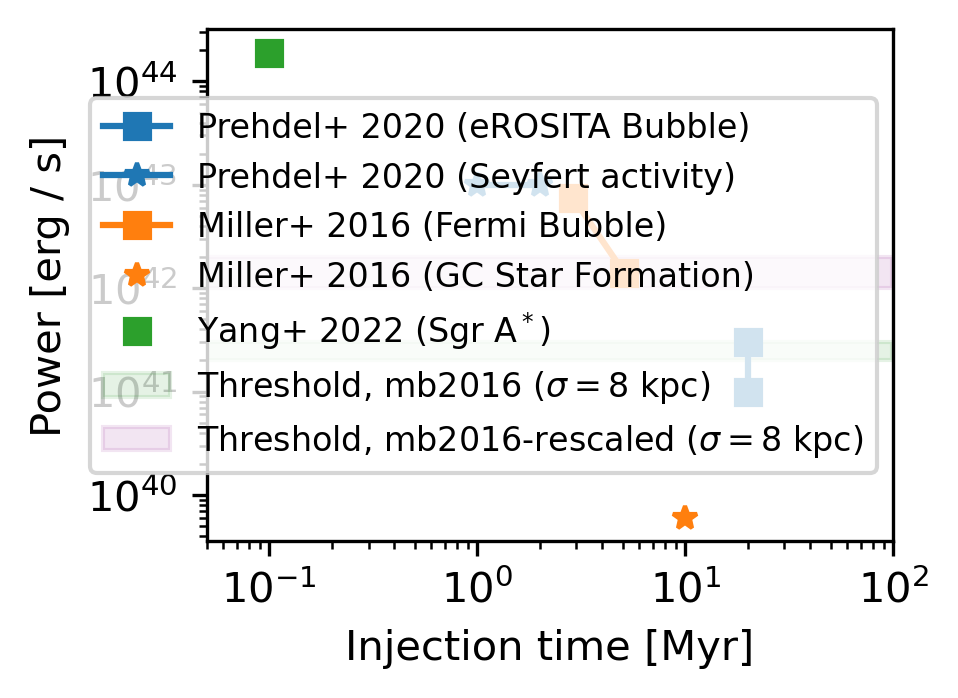

In [91]:
fig, ax = plt.subplots(1, 1)

times = np.arange(0.05, 100) * 1e6 * u.yr

# energies = np.array([8e55, 1.3e56]) * 2 * u.erg
# power_low = (energies[0] / times).to('erg / s')
# # ax.plot(times, power)

# power_up = (energies[1] / times).to('erg / s')
# ax.fill_between(times.value / 1e6, power_low.value, power_up.value, alpha=0.4, label='Prehdel+ 2020')

ax.plot([20, 20], [1e41, 3e41], marker='s', c='tab:blue', label='Prehdel+ 2020 (eROSITA Bubble)')
ax.plot([1, 2], [1e43, 1e43], marker='*', c='tab:blue', label='Prehdel+ 2020 (Seyfert activity)')


ax.plot([2.9, 5.1], [7.4e42, 1.4e42], marker='s', label=r'Miller+ 2016 (Fermi Bubble)', c='tab:orange')

ax.plot(10, 6e39, ls='', marker='*', label='Miller+ 2016 (GC Star Formation)', c='tab:orange')

# Multiply by 2 for 2 bubbles!
# 0.3 for thermalization efficiency
ax.plot(0.1, 0.3*2 * 3.16e44, ls='', marker='s', label='Yang+ 2022 (Sgr A$^*$)', c='tab:green')


sigma = 8
if sigma == 8:
    ## 8e3 kpc scale:
    mb_normal = np.array([2, 3]) * 1e41 # erg / s
    mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
elif sigma == 5:
    # 5e3 kpc scale:
    mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
    mb_rescaled = np.array([1, 5]) * 1e41 # erg / s

ax.fill_between([times[0].value / 1e6, times[-1].value / 1e6], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]], color='green', alpha=0.1, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
ax.fill_between([times[0].value / 1e6, times[-1].value / 1e6], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]], color='purple', alpha=0.1, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=8)
ax.set_ylabel('Power [erg / s]')
ax.set_xlabel('Injection time [Myr]')
ax.set_xlim(0.05, 100)

savefig(fig, f"energy-injection-comparison-S{sigma}e3")

fig.show()

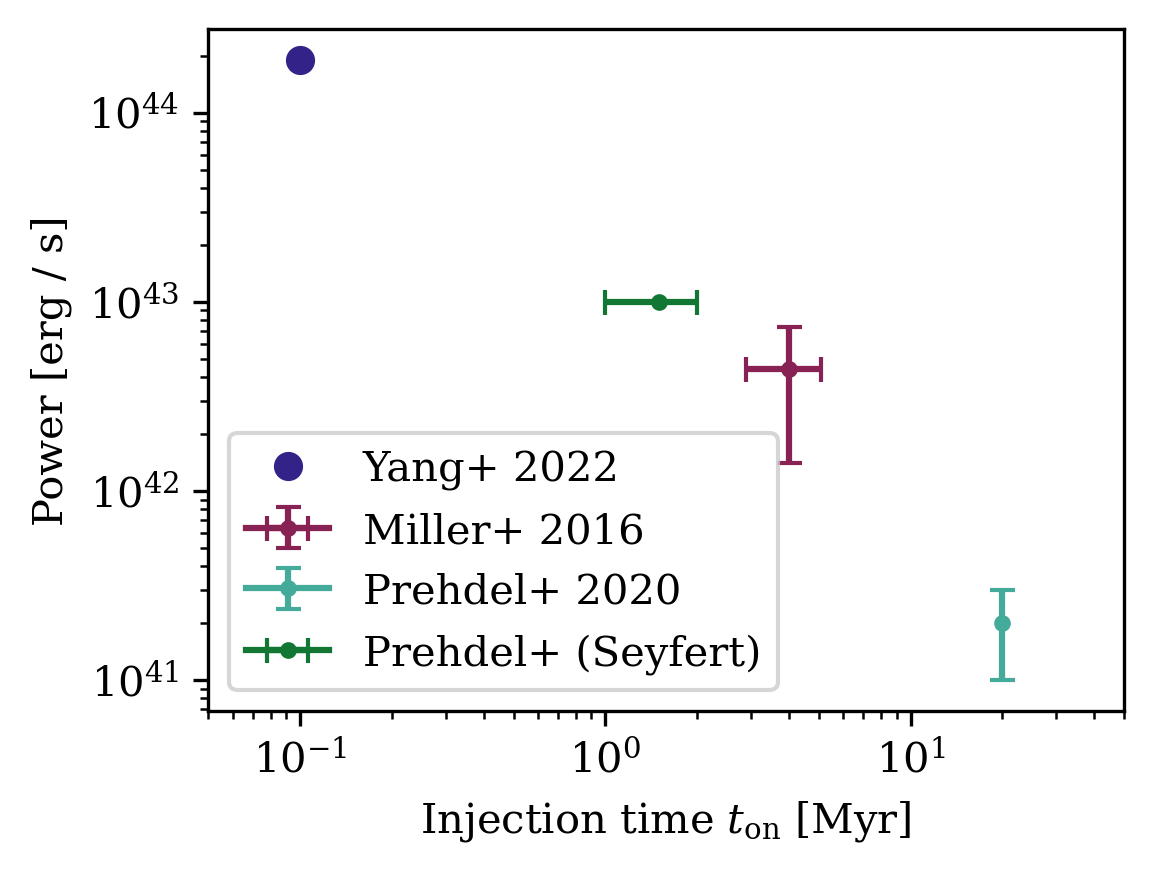

In [248]:
fig, ax = plt.subplots(1, 1)

times = np.arange(0.05, 100) * 1e6 * u.yr


# energies = np.array([8e55, 1.3e56]) * 2 * u.erg
# power_low = (energies[0] / times).to('erg / s')
# # ax.plot(times, power)

# power_up = (energies[1] / times).to('erg / s')
# ax.fill_between(times.value / 1e6, power_low.value, power_up.value, alpha=0.4, label='Prehdel+ 2020')
legend_lines = []
xs = np.array([2.9, 5.1])
ys = np.array([7.4e42, 1.4e42])
# ax.plot([2.9, 5.1], [7.4e42, 1.4e42], marker='o', label=r'Miller+ 2016', c='#dd513a')
tline = ax.errorbar(xs.mean(), ys.mean(), yerr=ys.mean() - ys[-1], xerr=xs.mean() - xs[0], marker='.', capsize=3, label=r'Miller+ 2016', c=c_mb2016)
legend_lines.append(tline)

xs = np.array([20, 20])
ys = np.array([1e41, 3e41])
tline = ax.errorbar(xs.mean(), ys.mean(), yerr=ys.mean() - ys[0], marker='.', capsize=3, c=c_prehdel, label='Prehdel+ 2020')
legend_lines.append(tline)
# ax.plot([20, 20], [1e41, 3e41], marker='o', c='#993270', label='Prehdel+ 2020')

xs = np.array([1, 2])
ys = np.array([1e43, 1e43])
tline = ax.errorbar(xs.mean(), ys.mean(), xerr=xs.mean() - xs[0], marker='.', capsize=3, c=c_seyfert, label='Prehdel+ (Seyfert)')
legend_lines.append(tline)
# ax.plot([1, 2], [1e43, 1e43], marker='o', c='#420a68', label='Prehdel+ (Seyfert)')

# ax.plot(10, 6e39, ls='', marker='*', label='Miller+ 2016 (GC Star Formation)', c='tab:orange')

# Multiply by 2 for 2 bubbles!
# 0.3 for thermalization efficiency
fin_line = ax.plot(0.1, 0.3*2 * 3.16e44, ls='', marker='o', label='Yang+ 2022', c=c_yang)


# sigma = 8
# if sigma == 8:
#     ## 8e3 kpc scale:
#     mb_normal = np.array([2, 3]) * 1e41 # erg / s
#     mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
# elif sigma == 5:
#     # 5e3 kpc scale:
#     mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
#     mb_rescaled = np.array([1, 5]) * 1e41 # erg / s

# # ax.fill_between([times[0].value / 1e6, times[-1].value / 1e6], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]], color='green', alpha=0.1, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
# # ax.fill_between([times[0].value / 1e6, times[-1].value / 1e6], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]], color='purple', alpha=0.1, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')
# mb_normal = np.array([2, 3]) * 1e41 # erg / s
# mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
# ax.axhline(mb_normal[0], ls='--', c='tab:blue', label='mb2016')
# ax.axhline(mb_rescaled[0], ls='--', c='tab:orange', label='mb2016-rescaled')

# mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
# mb_rescaled = np.array([1, 5]) * 1e41 # erg / s
# ax.axhline(mb_normal[0], ls=':', c='tab:blue', label='mb2016')
# ax.axhline(mb_rescaled[0], ls=':', c='tab:orange', label='mb2016-rescaled')

ax.set_yscale('log')
ax.set_xscale('log')
# ax.legend(fontsize=8)
ax.set_ylabel('Power [erg / s]')
ax.set_xlabel(r'Injection time $t_{\rm on}$ [Myr]')
ax.set_xlim(0.05, 50)

lines = ax.get_lines()

new_lines = [
#     *[l[0] for l in legend_lines],
    *legend_lines,
#     tline,
#     Patch(color='tab:blue', label='mb2016'),
#     Patch(color='tab:orange', label='mb2016-rescaled'),
#     Line2D([0], [0], c='gray', ls='--', label='$\sigma = 8$ kpc'),
#     Line2D([0], [0], c='gray', ls=':', label='$\sigma = 5$ kpc'),
]

# ax.legend(handles=lines[:-4] + new_lines, fontsize=7, loc='lower left', framealpha=1)
ax.legend()

savefig(fig, f"energy-injection-comparison")

fig.show()

## Average Power

mb2016-high 7.4e+42
mb2016-low 1.4e+42
predehl2020-high 3e+41
predehl2020-low 1e+41
predehl2020-seyfert-high 1e+42
predehl2020-seyfert-low 5e+41
yang2022 7.292307692307692e+42
mb2016-high mb2016-low
7.4e+42 1.4e+42
4.4e+42 3e+42
CHECK 3e+42 == 2.9999999999999997e+42
predehl2020-high predehl2020-low
3e+41 1e+41
2e+41 1e+41
CHECK 1e+41 == 9.999999999999998e+40
predehl2020-seyfert-high predehl2020-seyfert-low
1e+42 5e+41
7.5e+41 2.5000000000000005e+41
CHECK 2.5000000000000005e+41 == 2.4999999999999997e+41


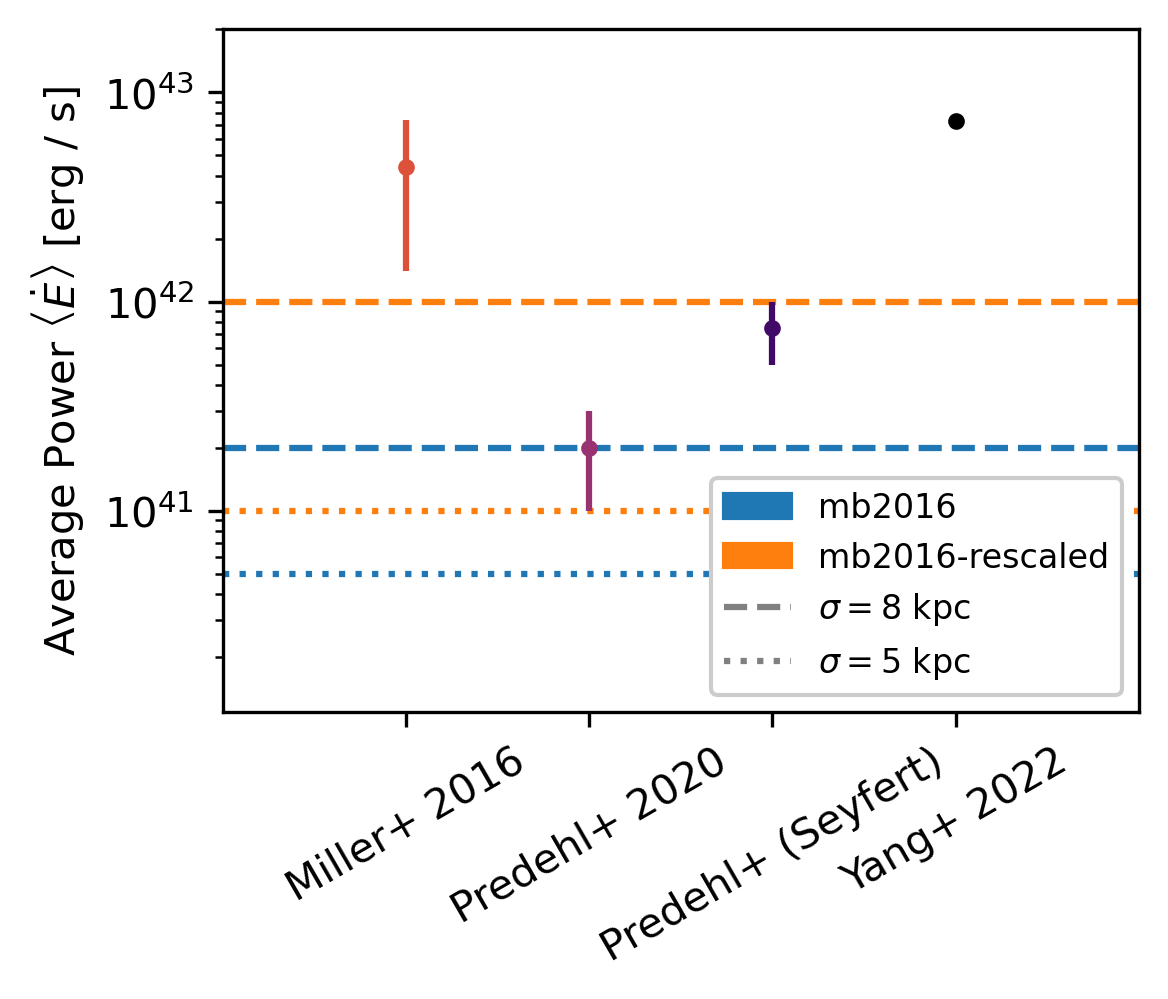

In [180]:
from itertools import islice
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# xs = np.array([2.9, 5.1])
# ys = np.array([7.4e42, 1.4e42])
thermal_efficiency = 0.3
# We need for all sources:
sources = [
    { 't_on': 2.9, 't_off': 0, 'power': 7.4e42, 'name': 'mb2016-high' },
    { 't_on': 5.1, 't_off': 0, 'power': 1.4e42, 'name': 'mb2016-low' },
    
    { 't_on': 20, 't_off': 0, 'power': 3e41, 'name': 'predehl2020-high' },
    { 't_on': 20, 't_off': 0, 'power': 1e41, 'name': 'predehl2020-low' },
    
    { 't_on': 2, 't_off': 20-2, 'power': 1e43, 'name': 'predehl2020-seyfert-high' },
    { 't_on': 1, 't_off': 20-1, 'power': 1e43, 'name': 'predehl2020-seyfert-low' },
    
    { 't_on': 0.1, 't_off': 2.6-0.1, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022' },
]

for source in sources:
    source['avg_power'] = source['power']*source['t_on'] / (source['t_on'] + source['t_off'])
    print(f"{source['name']} {source['avg_power']}")
    
comb_sources = []
for i, s in islice(enumerate(sources), 0, len(sources)-1, 2):
    high = s
    low = sources[i+1]
    print(high['name'], low['name'])
    print(high['avg_power'], low['avg_power'])
    
    new_s = {}
    new_s['mid'] = (high['avg_power'] + low['avg_power']) / 2
    new_s['err'] = new_s['mid'] - low['avg_power']
    print(new_s['mid'], new_s['err'])
    print(f"CHECK {new_s['err']} == {high['avg_power'] - new_s['mid']}")
    comb_sources.append(new_s)
    
    


kwargs = dict(alpha = 1.0, marker='.', ls='', capsize=0, zorder=10)
fig, ax = plt.subplots(1, 1)

apowers = [s['mid'] for s in comb_sources]
err = [s['err'] for s in comb_sources]
names = ["Miller+ 2016", "Predehl+ 2020", "Predehl+ (Seyfert)", "Yang+ 2022"]

colors = ['#dd513a', '#993270', '#420a68', 'k']
# colors = ['#fca50a', '#dd513a', '#993270', '#420a68']
x_pos = np.arange(len(names))


for i in range(len(apowers)):
    ax.errorbar(x_pos[i], apowers[i], yerr=err[i], c=colors[i], **kwargs)#, uplims=True)
ax.errorbar(x_pos[-1:], sources[-1]['avg_power'], yerr=0, c=colors[-1], **kwargs)#, uplims=True)


# sigma = 8
# if sigma == 8:
#     ## 8e3 kpc scale:
#     mb_normal = np.array([2, 3]) * 1e41 # erg / s
#     mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
# elif sigma == 5:
#     # 5e3 kpc scale:
#     mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
#     mb_rescaled = np.array([1, 5]) * 1e41 # erg / s

mb_normal = np.array([2, 3]) * 1e41 # erg / s
mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
ax.axhline(mb_normal[0], ls='--', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[0], ls='--', c='tab:orange', label='mb2016-rescaled')

mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
mb_rescaled = np.array([1, 5]) * 1e41 # erg / s
ax.axhline(mb_normal[0], ls=':', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[0], ls=':', c='tab:orange', label='mb2016-rescaled')

ax.set_yscale('log')
ax.set_xticks(x_pos, labels=names, rotation=30)
ax.set_ylabel(r'Average Power $\left<\dot E \right>$ [erg / s]')
ax.set_xlim(-1, x_pos[-1]+1)
ax.set_ylim(1.1e40, 2e43)

lines = [
    Patch(color='tab:blue', label='mb2016'),
    Patch(color='tab:orange', label='mb2016-rescaled'),
    Line2D([0], [0], c='gray', ls='--', label='$\sigma = 8$ kpc'),
    Line2D([0], [0], c='gray', ls=':', label='$\sigma = 5$ kpc'),
]
ax.legend(handles=lines, fontsize=8, loc='lower right', framealpha=1)

savefig(fig, f"average-power-comparison")
fig.show()

mb2016-high 7.4e+42
mb2016-low 1.0004928536224741e+41
predehl2020-high 3e+41
predehl2020-low 2.727272727272727e+40
predehl2020-seyfert-high 1e+42
predehl2020-seyfert-low 9.090909090909092e+40
yang2022-high 7.292307692307692e+42
yang2022-low 9.358341559723592e+40
mb2016-high mb2016-low
7.4e+42 1.0004928536224741e+41
3.750024642681124e+42 3.6499753573188767e+42
CHECK 3.6499753573188767e+42 == 3.649975357318876e+42
predehl2020-high predehl2020-low
3e+41 2.727272727272727e+40
1.6363636363636363e+41 1.3636363636363636e+41
CHECK 1.3636363636363636e+41 == 1.3636363636363636e+41
predehl2020-seyfert-high predehl2020-seyfert-low
1e+42 9.090909090909092e+40
5.454545454545455e+41 4.545454545454546e+41
CHECK 4.545454545454546e+41 == 4.5454545454545454e+41
yang2022-high yang2022-low
7.292307692307692e+42 9.358341559723592e+40
3.692945553952464e+42 3.599362138355228e+42
CHECK 3.599362138355228e+42 == 3.5993621383552276e+42
3.750024642681124e+42 7.4e+42 1.0004928536224741e+41
1.6363636363636363e+41 3e

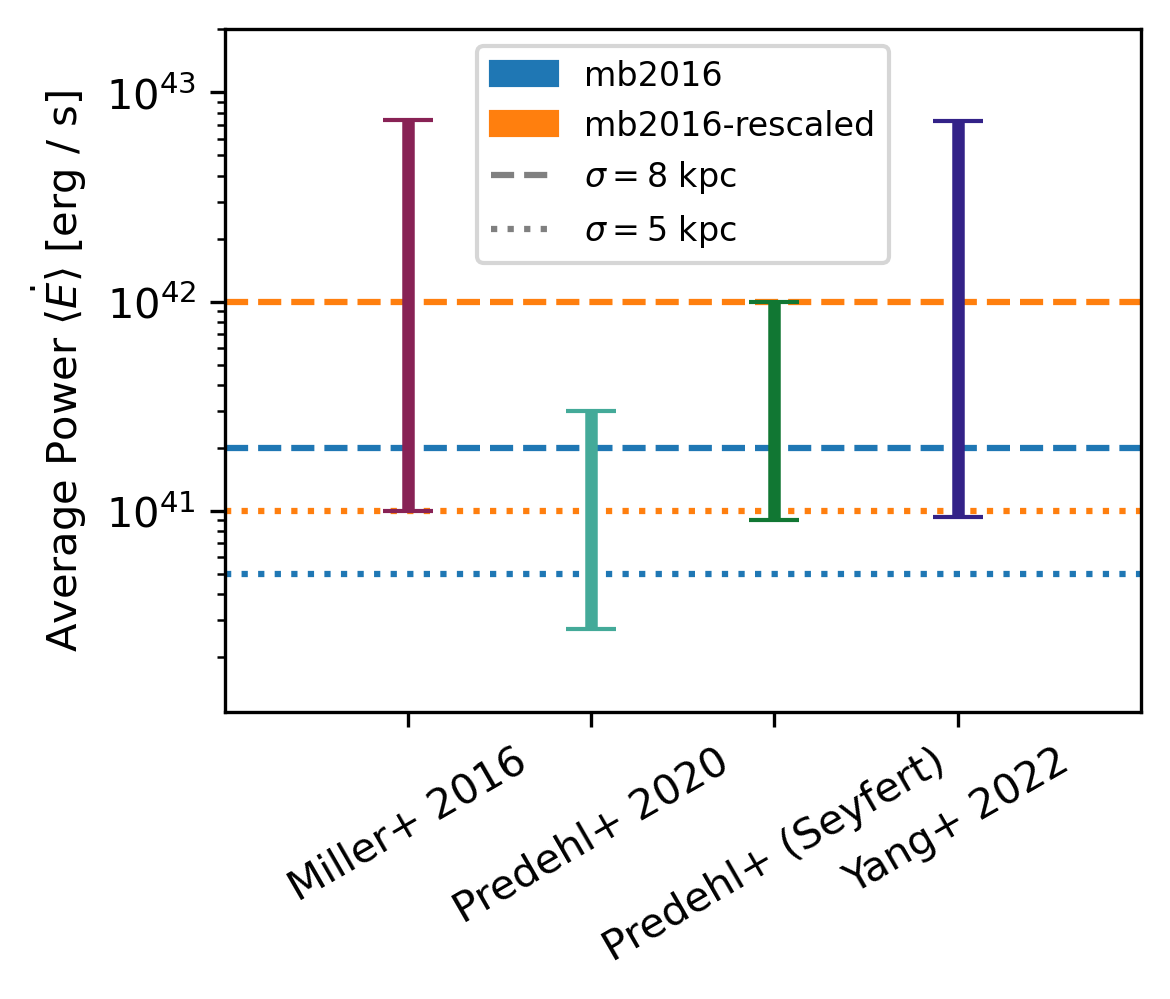

In [223]:
from itertools import islice
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

thermal_efficiency = 0.3
t_off_offset = 200
# We need for all sources:
sources = [
#     { 't_on': 5.1, 't_off': 0, 'power': 1.4e42, 'name': 'mb2016-high' },
#     { 't_on': 5.1, 't_off': t_off_offset, 'power': 1.4e42, 'name': 'mb2016-low' },
    { 't_on': 2.9, 't_off': 0, 'power': 7.4e42, 'name': 'mb2016-high' },
    { 't_on': 2.9, 't_off': t_off_offset, 'power': 7e42, 'name': 'mb2016-low' },
#     { 't_on': 2.9, 't_off': 0, 'power': 7.4e42, 'name': 'mb2016-high' },
#     { 't_on': 5.1, 't_off': 0, 'power': 1.4e42, 'name': 'mb2016-low' },
    
    { 't_on': 20, 't_off': 0, 'power': 3e41, 'name': 'predehl2020-high' },
    { 't_on': 20, 't_off': t_off_offset, 'power': 3e41, 'name': 'predehl2020-low' },
    
    { 't_on': 2, 't_off': 20-2, 'power': 1e43, 'name': 'predehl2020-seyfert-high' },
    { 't_on': 2, 't_off': 20-2 + t_off_offset, 'power': 1e43, 'name': 'predehl2020-seyfert-low' },
    
    { 't_on': 0.1, 't_off': 2.6-0.1, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022-high' },
    { 't_on': 0.1, 't_off': 2.6-0.1+ t_off_offset, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022-low' },
]

for source in sources:
    source['avg_power'] = source['power']*source['t_on'] / (source['t_on'] + source['t_off'])
    print(f"{source['name']} {source['avg_power']}")
    
comb_sources = []
for i, s in islice(enumerate(sources), 0, None, 2):
    high = s
    low = sources[i+1]
    print(high['name'], low['name'])
    print(high['avg_power'], low['avg_power'])
    
    new_s = {}
    new_s['mid'] = (high['avg_power'] + low['avg_power']) / 2
    new_s['err'] = new_s['mid'] - low['avg_power']
    new_s['high'] = high['avg_power']
    new_s['low'] = low['avg_power']
    print(new_s['mid'], new_s['err'])
    print(f"CHECK {new_s['err']} == {high['avg_power'] - new_s['mid']}")
    comb_sources.append(new_s)
    
    


kwargs = dict(alpha = 1.0, marker='', lw=3, ls='', capsize=6, zorder=10)
fig, ax = plt.subplots(1, 1)

apowers = [s['mid'] for s in comb_sources]
highs = [s['high'] for s in comb_sources]
lows = [s['low'] for s in comb_sources]
err = [s['err'] for s in comb_sources]
names = ["Miller+ 2016", "Predehl+ 2020", "Predehl+ (Seyfert)", "Yang+ 2022"]

colors = [c_mb2016, c_prehdel, c_seyfert, c_yang,]

# colors = ['#dd513a', '#993270', '#420a68', 'k']
# colors = ['#fca50a', '#dd513a', '#993270', '#420a68']
x_pos = np.arange(len(names))


for i in range(len(apowers)):
    print(apowers[i], highs[i], lows[i])
    ax.errorbar(x_pos[i], apowers[i], yerr=err[i], c=colors[i], **kwargs)
# ax.errorbar(x_pos[-1:], sources[6]['avg_power'], yerr=x_pos[-1:]/10, c=colors[-1], **kwargs, uplims=True)


# sigma = 8
# if sigma == 8:
#     ## 8e3 kpc scale:
#     mb_normal = np.array([2, 3]) * 1e41 # erg / s
#     mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
# elif sigma == 5:
#     # 5e3 kpc scale:
#     mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
#     mb_rescaled = np.array([1, 5]) * 1e41 # erg / s

mb_normal = np.array([2, 3]) * 1e41 # erg / s
mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
ax.axhline(mb_normal[0], ls='--', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[0], ls='--', c='tab:orange', label='mb2016-rescaled')
# ax.axhline(mb_normal[1], ls='--', c='tab:blue', label='mb2016')
# ax.axhline(mb_rescaled[1], ls='--', c='tab:orange', label='mb2016-rescaled')
# ax.fill_between([-1, x_pos[-1]+1], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]],
#                 color='tab:blue', alpha=0.1, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
# ax.fill_between([-1, x_pos[-1]+1], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]],
#                 color='tab:orange', alpha=0.1, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
mb_rescaled = np.array([1, 5]) * 1e41 # erg / s
ax.axhline(mb_normal[0], ls=':', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[0], ls=':', c='tab:orange', label='mb2016-rescaled')
# ax.axhline(mb_normal[1], ls=':', c='tab:blue', label='mb2016')
# ax.axhline(mb_rescaled[1], ls=':', c='tab:orange', label='mb2016-rescaled')
# ax.fill_between([-1, x_pos[-1]+1], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]],
#                 color='tab:blue', alpha=0.1, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
# ax.fill_between([-1, x_pos[-1]+1], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]],
#                 color='tab:orange', alpha=0.1, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

ax.set_yscale('log')
ax.set_xticks(x_pos, labels=names, rotation=30)
ax.set_ylabel(r'Average Power $\dot{\left< E \right>}$ [erg / s]')
ax.set_xlim(-1, x_pos[-1]+1)
ax.set_ylim(1.1e40, 2e43)

lines = [
    Patch(color='tab:blue', label='mb2016'),
    Patch(color='tab:orange', label='mb2016-rescaled'),
    Line2D([0], [0], c='gray', ls='--', label='$\sigma = 8$ kpc'),
    Line2D([0], [0], c='gray', ls=':', label='$\sigma = 5$ kpc'),
]
ax.legend(handles=lines, fontsize=8)#, loc='lower right', framealpha=1)

savefig(fig, f"average-power-comparison-other")
fig.show()

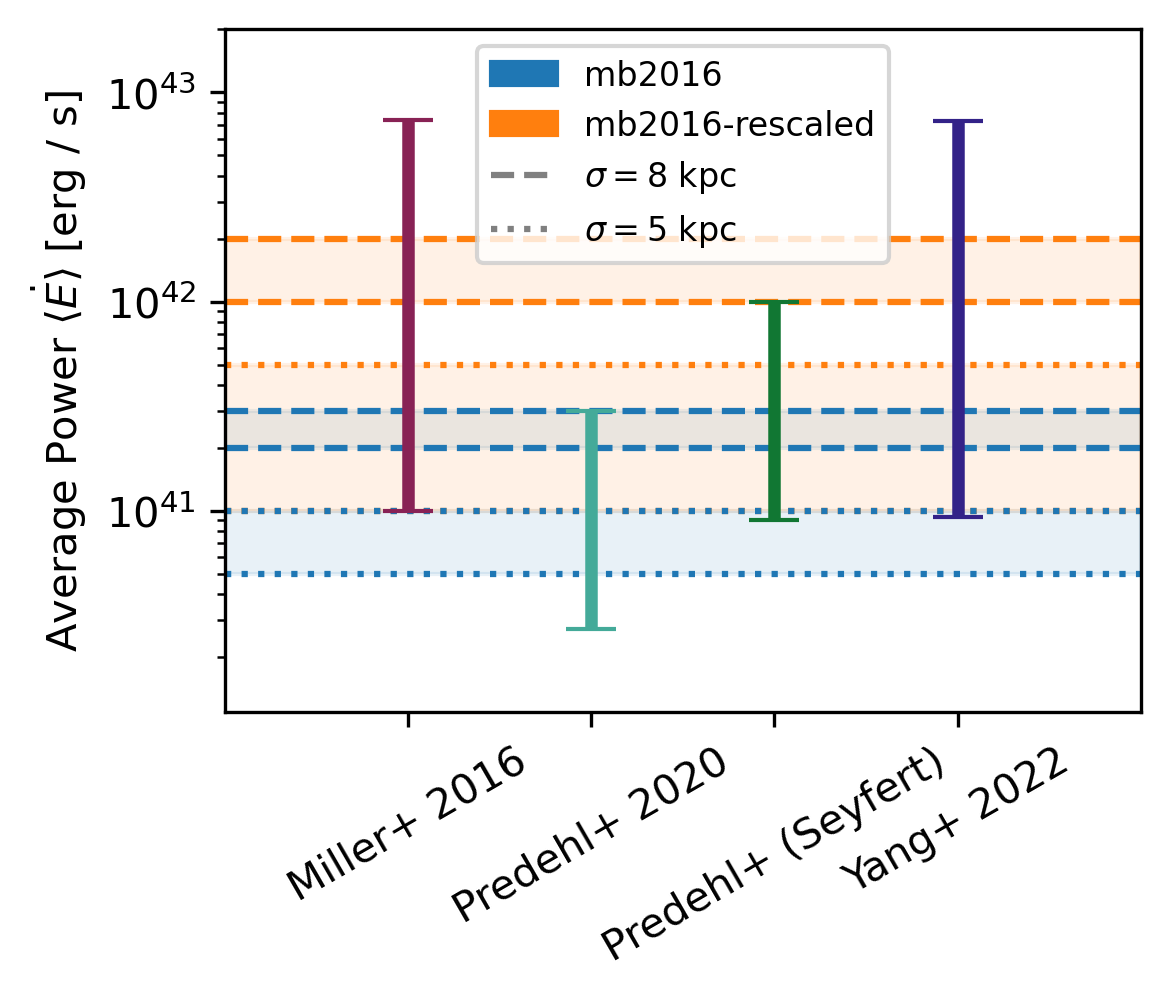

In [231]:
from itertools import islice
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

thermal_efficiency = 0.3
t_off_offset = 200
# We need for all sources:
sources = [
#     { 't_on': 5.1, 't_off': 0, 'power': 1.4e42, 'name': 'mb2016-high' },
#     { 't_on': 5.1, 't_off': t_off_offset, 'power': 1.4e42, 'name': 'mb2016-low' },
    { 't_on': 2.9, 't_off': 0, 'power': 7.4e42, 'name': 'mb2016-high' },
    { 't_on': 2.9, 't_off': t_off_offset, 'power': 7e42, 'name': 'mb2016-low' },
#     { 't_on': 2.9, 't_off': 0, 'power': 7.4e42, 'name': 'mb2016-high' },
#     { 't_on': 5.1, 't_off': 0, 'power': 1.4e42, 'name': 'mb2016-low' },
    
    { 't_on': 20, 't_off': 0, 'power': 3e41, 'name': 'predehl2020-high' },
    { 't_on': 20, 't_off': t_off_offset, 'power': 3e41, 'name': 'predehl2020-low' },
    
    { 't_on': 2, 't_off': 20-2, 'power': 1e43, 'name': 'predehl2020-seyfert-high' },
    { 't_on': 2, 't_off': 20-2 + t_off_offset, 'power': 1e43, 'name': 'predehl2020-seyfert-low' },
    
    { 't_on': 0.1, 't_off': 2.6-0.1, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022-high' },
    { 't_on': 0.1, 't_off': 2.6-0.1+ t_off_offset, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022-low' },
]

for source in sources:
    source['avg_power'] = source['power']*source['t_on'] / (source['t_on'] + source['t_off'])
#     print(f"{source['name']} {source['avg_power']}")
    
comb_sources = []
for i, s in islice(enumerate(sources), 0, None, 2):
    high = s
    low = sources[i+1]
#     print(high['name'], low['name'])
#     print(high['avg_power'], low['avg_power'])
    
    new_s = {}
    new_s['mid'] = (high['avg_power'] + low['avg_power']) / 2
    new_s['err'] = new_s['mid'] - low['avg_power']
    new_s['high'] = high['avg_power']
    new_s['low'] = low['avg_power']
#     print(new_s['mid'], new_s['err'])
#     print(f"CHECK {new_s['err']} == {high['avg_power'] - new_s['mid']}")
    comb_sources.append(new_s)
    
    


kwargs = dict(alpha = 1.0, marker='', lw=3, ls='', capsize=6, zorder=10)
fig, ax = plt.subplots(1, 1)

apowers = [s['mid'] for s in comb_sources]
highs = [s['high'] for s in comb_sources]
lows = [s['low'] for s in comb_sources]
err = [s['err'] for s in comb_sources]
names = ["Miller+ 2016", "Predehl+ 2020", "Predehl+ (Seyfert)", "Yang+ 2022"]

colors = [c_mb2016, c_prehdel, c_seyfert, c_yang,]
# colors = ['#dd513a', '#993270', '#420a68', 'k']
# colors = ['#fca50a', '#dd513a', '#993270', '#420a68']
x_pos = np.arange(len(names))


for i in range(len(apowers)):
#     print(apowers[i], highs[i], lows[i])
    ax.errorbar(x_pos[i], apowers[i], yerr=err[i], c=colors[i], **kwargs)

mb_normal = np.array([2, 3]) * 1e41 # erg / s
mb_rescaled = np.array([1, 2]) * 1e42 # erg / s
ax.axhline(mb_normal[0], ls='--', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[0], ls='--', c='tab:orange', label='mb2016-rescaled')
ax.axhline(mb_normal[1], ls='--', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[1], ls='--', c='tab:orange', label='mb2016-rescaled')
ax.fill_between([-1, x_pos[-1]+1], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]],
                color='tab:blue', alpha=0.1, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
ax.fill_between([-1, x_pos[-1]+1], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]],
                color='tab:orange', alpha=0.1, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
mb_rescaled = np.array([1, 5]) * 1e41 # erg / s
ax.axhline(mb_normal[0], ls=':', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[0], ls=':', c='tab:orange', label='mb2016-rescaled')
ax.axhline(mb_normal[1], ls=':', c='tab:blue', label='mb2016')
ax.axhline(mb_rescaled[1], ls=':', c='tab:orange', label='mb2016-rescaled')
ax.fill_between([-1, x_pos[-1]+1], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]],
                color='tab:blue', alpha=0.1, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
ax.fill_between([-1, x_pos[-1]+1], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]],
                color='tab:orange', alpha=0.1, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

ax.set_yscale('log')
ax.set_xticks(x_pos, labels=names, rotation=30)
ax.set_ylabel(r'Average Power $\dot{\left< E \right>}$ [erg / s]')
ax.set_xlim(-1, x_pos[-1]+1)
ax.set_ylim(1.1e40, 2e43)

lines = [
    Patch(color='tab:blue', label='mb2016'),
    Patch(color='tab:orange', label='mb2016-rescaled'),
    Line2D([0], [0], c='gray', ls='--', label='$\sigma = 8$ kpc'),
    Line2D([0], [0], c='gray', ls=':', label='$\sigma = 5$ kpc'),
]
ax.legend(handles=lines, fontsize=8)#, loc='lower right', framealpha=1)

savefig(fig, f"average-power-comparison-other")
fig.show()

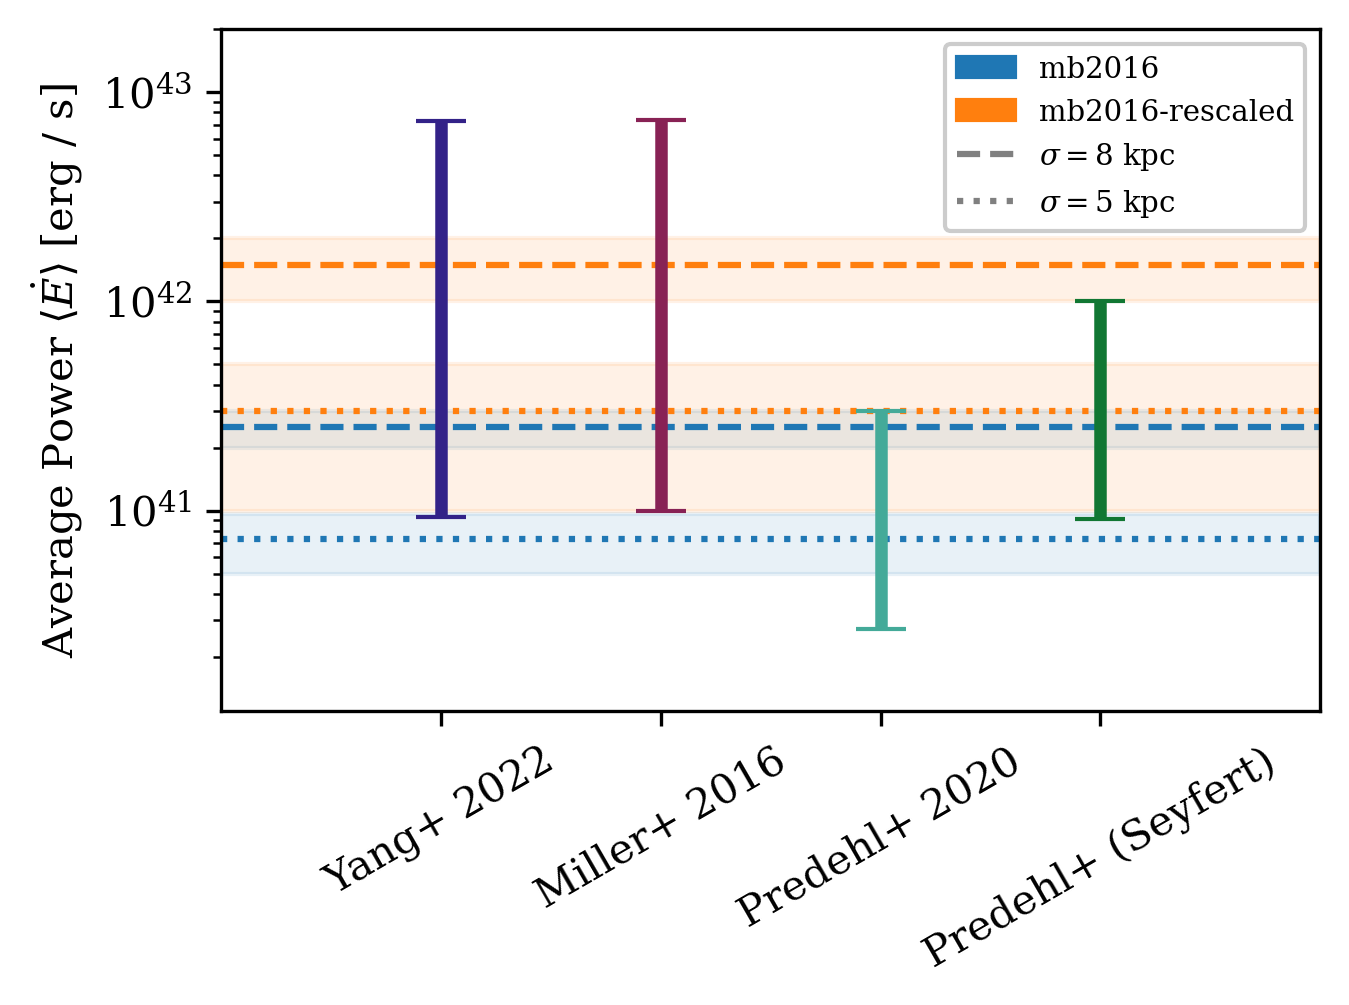

In [249]:
from itertools import islice
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

thermal_efficiency = 0.3
t_off_offset = 200
# We need for all sources:
sources = [
    { 't_on': 0.1, 't_off': 2.6-0.1, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022-high' },
    { 't_on': 0.1, 't_off': 2.6-0.1+ t_off_offset, 'power': thermal_efficiency*2*3.16e44, 'name': 'yang2022-low' },
    
    { 't_on': 2.9, 't_off': 0, 'power': 7.4e42, 'name': 'mb2016-high' },
    { 't_on': 2.9, 't_off': t_off_offset, 'power': 7e42, 'name': 'mb2016-low' },
    
    { 't_on': 20, 't_off': 0, 'power': 3e41, 'name': 'predehl2020-high' },
    { 't_on': 20, 't_off': t_off_offset, 'power': 3e41, 'name': 'predehl2020-low' },
    
    { 't_on': 2, 't_off': 20-2, 'power': 1e43, 'name': 'predehl2020-seyfert-high' },
    { 't_on': 2, 't_off': 20-2 + t_off_offset, 'power': 1e43, 'name': 'predehl2020-seyfert-low' },
]

for source in sources:
    source['avg_power'] = source['power']*source['t_on'] / (source['t_on'] + source['t_off'])
#     print(f"{source['name']} {source['avg_power']}")
    
comb_sources = []
for i, s in islice(enumerate(sources), 0, None, 2):
    high = s
    low = sources[i+1]
#     print(high['name'], low['name'])
#     print(high['avg_power'], low['avg_power'])
    
    new_s = {}
    new_s['mid'] = (high['avg_power'] + low['avg_power']) / 2
    new_s['err'] = new_s['mid'] - low['avg_power']
    new_s['high'] = high['avg_power']
    new_s['low'] = low['avg_power']
#     print(new_s['mid'], new_s['err'])
#     print(f"CHECK {new_s['err']} == {high['avg_power'] - new_s['mid']}")
    comb_sources.append(new_s)
    
    


kwargs = dict(alpha = 1.0, marker='', lw=3, ls='', capsize=6, zorder=10)
fig, ax = plt.subplots(1, 1, figsize=(MPL_STD_WIDTH/1.25, MPL_STD_HEIGHT/1.5))

apowers = [s['mid'] for s in comb_sources]
highs = [s['high'] for s in comb_sources]
lows = [s['low'] for s in comb_sources]
err = [s['err'] for s in comb_sources]
names = ["Yang+ 2022", "Miller+ 2016", "Predehl+ 2020", "Predehl+ (Seyfert)"]

colors = [c_yang, c_mb2016, c_prehdel, c_seyfert]
# colors = ['#dd513a', '#993270', '#420a68', 'k']
# colors = ['#fca50a', '#dd513a', '#993270', '#420a68']
x_pos = np.arange(len(names))


for i in range(len(apowers)):
#     print(apowers[i], highs[i], lows[i])
    ax.errorbar(x_pos[i], apowers[i], yerr=err[i], c=colors[i], **kwargs)

alpha = 0.1
mb_normal = np.array([2, 3]) * 1e41 # erg / s
mb_rescaled = np.array([1, 2]) * 1e42 # erg / s

ax.axhline((mb_normal[0] + mb_normal[1]) / 2, ls='--', c='tab:blue', label='mb2016')
ax.axhline((mb_rescaled[0] + mb_rescaled[1]) / 2, ls='--', c='tab:orange', label='mb2016-rescaled')

# ax.axhline(mb_rescaled[0], ls='--', c='tab:orange', label='mb2016-rescaled')
# ax.axhline(mb_rescaled[1], ls='--', c='tab:orange', label='mb2016-rescaled')

ax.fill_between([-1, x_pos[-1]+1], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]],
                color='tab:blue', alpha=alpha, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
ax.fill_between([-1, x_pos[-1]+1], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]],
                color='tab:orange', alpha=alpha, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

# mb_normal = np.array([0.5, 1]) * 1e41 # erg / s
mb_normal = np.array([0.5, 0.96]) * 1e41 # erg / s
mb_rescaled = np.array([1, 5]) * 1e41 # erg / s

ax.axhline((mb_normal[0] + mb_normal[1]) / 2, ls=':', c='tab:blue', label='mb2016')
ax.axhline((mb_rescaled[0] + mb_rescaled[1]) / 2, ls=':', c='tab:orange', label='mb2016-rescaled')

# ax.axhline(mb_normal[0], ls=':', c='tab:blue', label='mb2016')
# ax.axhline(mb_rescaled[0], ls=':', c='tab:orange', label='mb2016-rescaled')
# ax.axhline(mb_normal[1], ls=':', c='tab:blue', label='mb2016')
# ax.axhline(mb_rescaled[1], ls=':', c='tab:orange', label='mb2016-rescaled')
ax.fill_between([-1, x_pos[-1]+1], [mb_normal[0], mb_normal[0]], [mb_normal[1], mb_normal[1]],
                color='tab:blue', alpha=alpha, label=f'Threshold, mb2016 ($\sigma = {sigma}$ kpc)')
ax.fill_between([-1, x_pos[-1]+1], [mb_rescaled[0], mb_rescaled[0]], [mb_rescaled[1], mb_rescaled[1]],
                color='tab:orange', alpha=alpha, label=f'Threshold, mb2016-rescaled ($\sigma = {sigma}$ kpc)')

ax.set_yscale('log')
ax.set_xticks(x_pos, labels=names, rotation=30)
ax.set_ylabel(r'Average Power $\dot{\left< E \right>}$ [erg / s]')
ax.set_xlim(-1.0, x_pos[-1]+1)
ax.set_ylim(1.1e40, 2e43)

lines = [
    Patch(color='tab:blue', label='mb2016'),
    Patch(color='tab:orange', label='mb2016-rescaled'),
    Line2D([0], [0], c='gray', ls='--', label='$\sigma = 8$ kpc'),
    Line2D([0], [0], c='gray', ls=':', label='$\sigma = 5$ kpc'),
]
ax.legend(handles=lines, fontsize=7, loc='upper right', framealpha=1)

savefig(fig, f"average-power-comparison-bands")
fig.show()

## Volume

In [110]:
print("all volumes are in units kpc^3")
print(f"Sphere 8kpc:      {(4/3)*np.pi*(8)**3}")
print(f"Sphere 5kpc:      {(4/3)*np.pi*(5)**3}")
print(f"Sphere 4kpc:      {(4/3)*np.pi*(4)**3}")
print(f"Cylinder Fermi:   {np.pi * (6 / 2)**2 * (2*9)}")
print(f"Cylinder eROSITA: {np.pi * (14 / 2)**2 * (2*14)}")

all volumes are in units kpc^3
Sphere 8kpc:      2144.660584850632
Sphere 5kpc:      523.5987755982989
Sphere 4kpc:      268.082573106329
Cylinder Fermi:   508.93800988154646
Cylinder eROSITA: 4310.265120725196
